In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**STARTING GPU**

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.7457232330000068
GPU (s):
0.047994844000001535
GPU speedup over CPU: 78x


In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


4423680/4422102 [==============================] - 0s 0us/step


In [5]:
def fashion_model():
  model = tf.keras.Sequential()
  # Must define the input shape in the first layer of the neural network
  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  model.add(tf.keras.layers.Dropout(0.3))

  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  model.add(tf.keras.layers.Dropout(0.3))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  return model
# fashion_model()

In [26]:
fashion_model().summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)             

In [6]:
def Plotter(acc,val_acc,loss,val_loss,l_r):
  
  plt.plot(acc, label='accuracy')
  plt.plot(val_acc, label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()


  plt.plot(loss, label='loss')
  plt.plot(val_loss, label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.legend(loc='lower right')
  plt.show()

  plt.plot(l_r, label='Learning Rate')
  # plt.plot(val_loss, label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('LR')
  plt.legend(loc='lower right')
  plt.show()

In [7]:
model = fashion_model()

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
train_images.shape

(60000, 28, 28, 1)

**Test for LR**

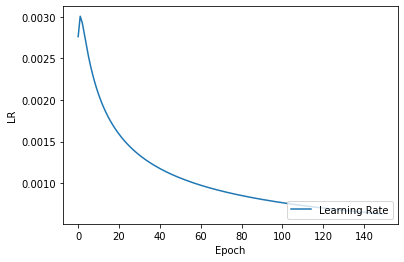

In [10]:
lr = []
epoo=150
for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

  # print(z,(batch_size)/((z+1)**(3/2))/80)

  LR = (batch_size)/((z+1)**(3/2)*80)
  LR=LR/8
  lr.append(LR)

plt.plot(lr, label='Learning Rate')
# plt.plot(val_loss, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('LR')
plt.legend(loc='lower right')
plt.show()

**Normal default fit** : LR and Batch Size default

In [11]:
# train_images = train_images.reshape(28,28,-1)
# test_images = test_images.reshape(28,28,-1)
history = model.fit(train_images, train_labels, epochs=150,
                    validation_data=(test_images, test_labels))





Epoch 1/150
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7403 - accuracy: 0.7274 - val_loss: 0.3710 - val_accuracy: 0.8663
Epoch 2/150
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4051 - accuracy: 0.8508 - val_loss: 0.3195 - val_accuracy: 0.8853
Epoch 3/150
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3488 - accuracy: 0.8719 - val_loss: 0.2878 - val_accuracy: 0.8974
Epoch 4/150
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3253 - accuracy: 0.8806 - val_loss: 0.2821 - val_accuracy: 0.8961
Epoch 5/150
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3025 - accuracy: 0.8888 - val_loss: 0.2627 - val_accuracy: 0.9027
Epoch 6/150
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2897 - accuracy: 0.8934 - val_loss: 0.2564 - val_accuracy: 0.9056
Epoch 7/150
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2851 - accuracy: 0.8940 - val_loss: 0.2457 - val_ac

In [12]:
acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']

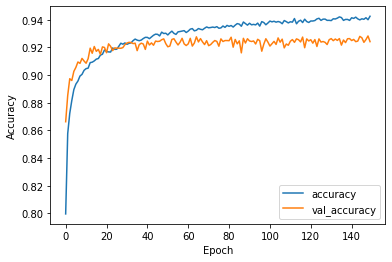

313/313 - 1s - loss: 0.2366 - accuracy: 0.9242


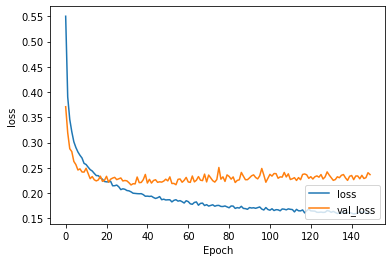

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()

**LR ∝ BS/Epoch**

In [14]:
model = fashion_model()

from keras.callbacks import LearningRateScheduler

LR = 0.01
epoch = 1
batch_size = 100

val_acc = []
acc = []
val_loss = []
loss = []
l_r = []

num = 0

for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

  LR = (batch_size)/(((z+1)**(3/2))*80)
  LR=LR/8

  print("\n\nepoch {z}, Learning Rate {LR}, Batch Size  {batch_size} "
                    .format(z=z,LR=LR,batch_size=batch_size))

  def set_LR(epoch,lr):
    global LR
    global l_r
    l_r.append(LR)
    return LR

  call = [ LearningRateScheduler(set_LR,verbose=1) ]

  history = model.fit(
            train_images, train_labels, 
            validation_data=(test_images, test_labels),
            epochs=epoch,
            batch_size=batch_size,
            callbacks=call
            )



  acc.append(history.history['accuracy'])
  val_acc.append(history.history['val_accuracy'])
  loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])

  # if(num >= 50 ):
  #   x = input("type anything if you want to continue >  ")
  #   num = 0
  # num += 1




epoch 1, Learning Rate 0.002762135864009951, Batch Size  5 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.002762135864009951.
12000/12000 [==============================] - 44s 4ms/step - loss: 0.6759 - accuracy: 0.7547 - val_loss: 0.4082 - val_accuracy: 0.8509


epoch 2, Learning Rate 0.003007032652029301, Batch Size  10 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003007032652029301.
6000/6000 [==============================] - 25s 4ms/step - loss: 0.4471 - accuracy: 0.8375 - val_loss: 0.3638 - val_accuracy: 0.8636


epoch 3, Learning Rate 0.0029296875, Batch Size  15 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0029296875.
4000/4000 [==============================] - 20s 5ms/step - loss: 0.4162 - accuracy: 0.8490 - val_loss: 0.3365 - val_accuracy: 0.8776


epoch 4, Learning Rate 0.002795084971874737, Batch Size  20 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.002795084971874737.
3000/3000 [==============

In [15]:
acc_2 = acc
val_acc_2 = val_acc

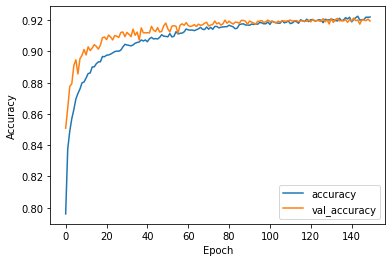

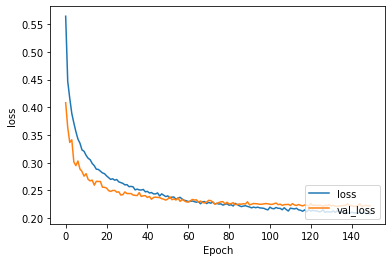

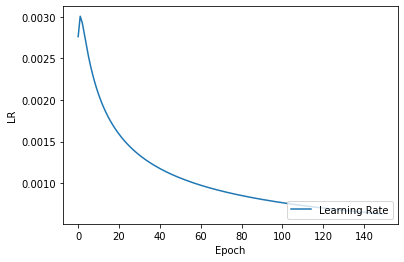

In [16]:
Plotter(acc,val_acc,loss,val_loss,l_r)

**Keeping batch size constant**

In [17]:
model = fashion_model()

from keras.callbacks import LearningRateScheduler

LR = 0.01
epoch = 1
batch_size = 100

val_acc = []
acc = []
val_loss = []
loss = []
l_r = []
for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

  LR = (batch_size)/(((z+1)**(3/2))*80)
  LR=LR/8

  print("\n\nepoch {z}, Learning Rate {LR}, Batch Size  {batch_size} "
                    .format(z=z,LR=LR,batch_size=batch_size))

  def set_LR(epoch,lr):
    global LR
    global l_r
    l_r.append(LR)
    return LR

  call = [ LearningRateScheduler(set_LR,verbose=1) ]

  history = model.fit(
            train_images, train_labels, 
            validation_data=(test_images, test_labels),
            epochs=epoch,
            # batch_size=batch_size,
            callbacks=call
            )



  acc.append(history.history['accuracy'])
  val_acc.append(history.history['val_accuracy'])
  loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])



epoch 1, Learning Rate 0.002762135864009951, Batch Size  5 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.002762135864009951.
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6793 - accuracy: 0.7505 - val_loss: 0.3461 - val_accuracy: 0.8761


epoch 2, Learning Rate 0.003007032652029301, Batch Size  10 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003007032652029301.
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4066 - accuracy: 0.8507 - val_loss: 0.3295 - val_accuracy: 0.8765


epoch 3, Learning Rate 0.0029296875, Batch Size  15 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0029296875.
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3745 - accuracy: 0.8609 - val_loss: 0.3141 - val_accuracy: 0.8831


epoch 4, Learning Rate 0.002795084971874737, Batch Size  20 

Epoch 00001: LearningRateScheduler reducing learning rate to 0.002795084971874737.
1875/1875 [===================

In [18]:
acc_3 = acc
val_acc_3 = val_acc

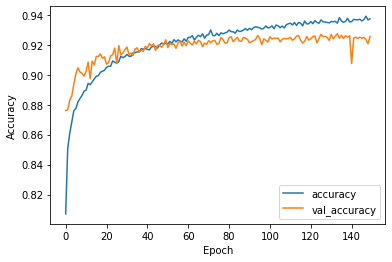

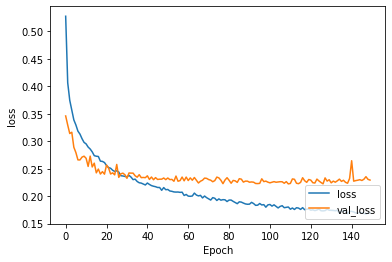

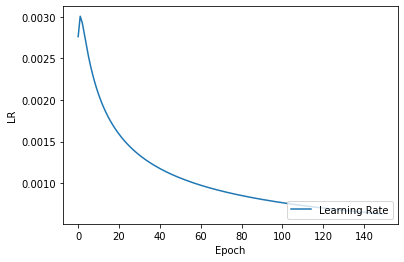

In [19]:
Plotter(acc,val_acc,loss,val_loss,l_r)

**LR constant**

In [20]:
model = fashion_model()

from keras.callbacks import LearningRateScheduler

LR = 0.01
epoch = 1
batch_size = 100

val_acc = []
acc = []
val_loss = []
loss = []
l_r = []
for z,batch_size in zip(range(1,epoo+1),range(5,10000,5)):

  LR = (batch_size)/(((z+1)**(3/2))*80)
  LR=LR/8

  print("\n\nepoch {z}, Learning Rate {LR}, Batch Size  {batch_size} "
                    .format(z=z,LR=LR,batch_size=batch_size))

  def set_LR(epoch,lr):
    global LR
    global l_r
    l_r.append(LR)
    return LR

  call = [ LearningRateScheduler(set_LR,verbose=1) ]

  history = model.fit(
            train_images, train_labels, 
            validation_data=(test_images, test_labels),
            epochs=epoch,
            batch_size=batch_size,
            # callbacks=call
            )



  acc.append(history.history['accuracy'])
  val_acc.append(history.history['val_accuracy'])
  loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])



epoch 1, Learning Rate 0.002762135864009951, Batch Size  5 
12000/12000 [==============================] - 45s 4ms/step - loss: 0.6518 - accuracy: 0.7630 - val_loss: 0.3633 - val_accuracy: 0.8622


epoch 2, Learning Rate 0.003007032652029301, Batch Size  10 
6000/6000 [==============================] - 26s 4ms/step - loss: 0.3619 - accuracy: 0.8681 - val_loss: 0.3052 - val_accuracy: 0.8869


epoch 3, Learning Rate 0.0029296875, Batch Size  15 
4000/4000 [==============================] - 20s 5ms/step - loss: 0.3236 - accuracy: 0.8806 - val_loss: 0.2835 - val_accuracy: 0.8950


epoch 4, Learning Rate 0.002795084971874737, Batch Size  20 
3000/3000 [==============================] - 14s 5ms/step - loss: 0.3061 - accuracy: 0.8878 - val_loss: 0.2807 - val_accuracy: 0.8966


epoch 5, Learning Rate 0.0026578664743741078, Batch Size  25 
2400/2400 [==============================] - 12s 5ms/step - loss: 0.2891 - accuracy: 0.8932 - val_loss: 0.2617 - val_accuracy: 0.9043


epoch 6, Learning R

In [21]:
acc_4 = acc
val_acc_4 = val_acc

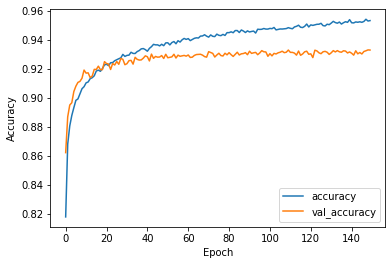

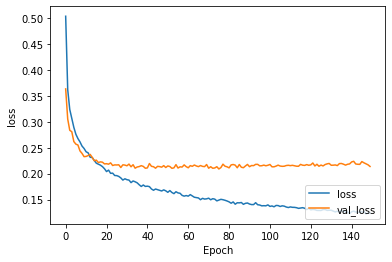

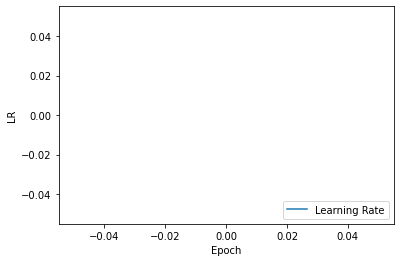

In [22]:
Plotter(acc,val_acc,loss,val_loss,l_r)

**Plotting all of them**

---



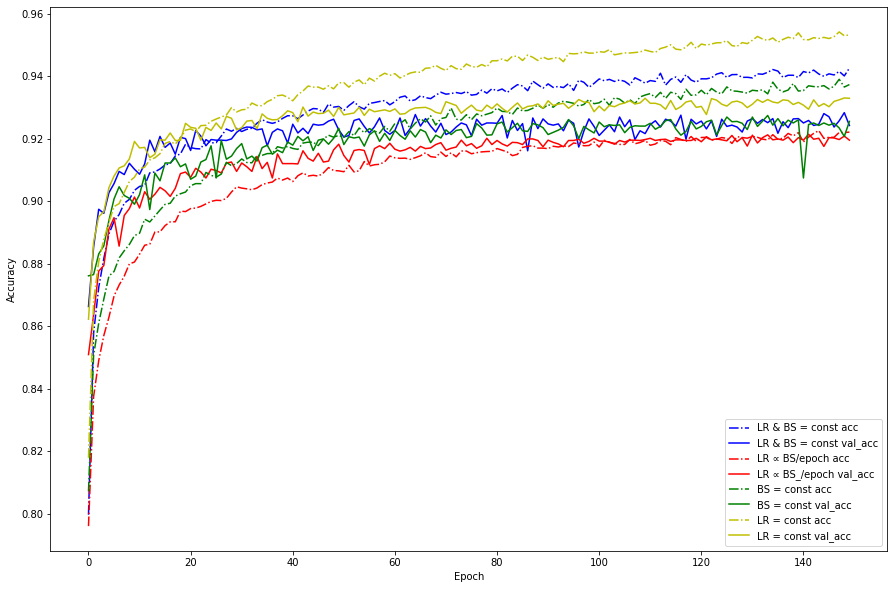

In [23]:
plt.figure(figsize=(15, 10))

plt.plot(acc_1, label='LR & BS = const acc',ls='-.',c='b')
plt.plot(val_acc_1, label = 'LR & BS = const val_acc',c='b')
plt.plot(acc_2, label='LR ∝ BS/epoch acc',ls='-.',c='r')
plt.plot(val_acc_2, label = 'LR ∝ BS_/epoch val_acc',c='r')
plt.plot(acc_3, label='BS = const acc',ls='-.',c='g')
plt.plot(val_acc_3, label = 'BS = const val_acc',c='g')
plt.plot(acc_4, label='LR = const acc',ls='-.',c='y')
plt.plot(val_acc_4, label = 'LR = const val_acc',c='y')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


# case4_fashion_acc,case4_fashion_val_acc0

In [24]:
acc_1_dif = []
for i in range(len(acc_1)): acc_1_dif.append(acc_1[i] - val_acc_1[i]) 
acc_2_dif = []
for i in range(len(acc_2)): acc_2_dif.append(acc_2[i][0] - val_acc_2[i][0]) 
acc_3_dif = []
for i in range(len(acc_3)): acc_3_dif.append(acc_3[i][0] - val_acc_3[i][0]) 
acc_4_dif = []
for i in range(len(acc_4)): acc_4_dif.append(acc_4[i][0] - val_acc_4[i][0]) 

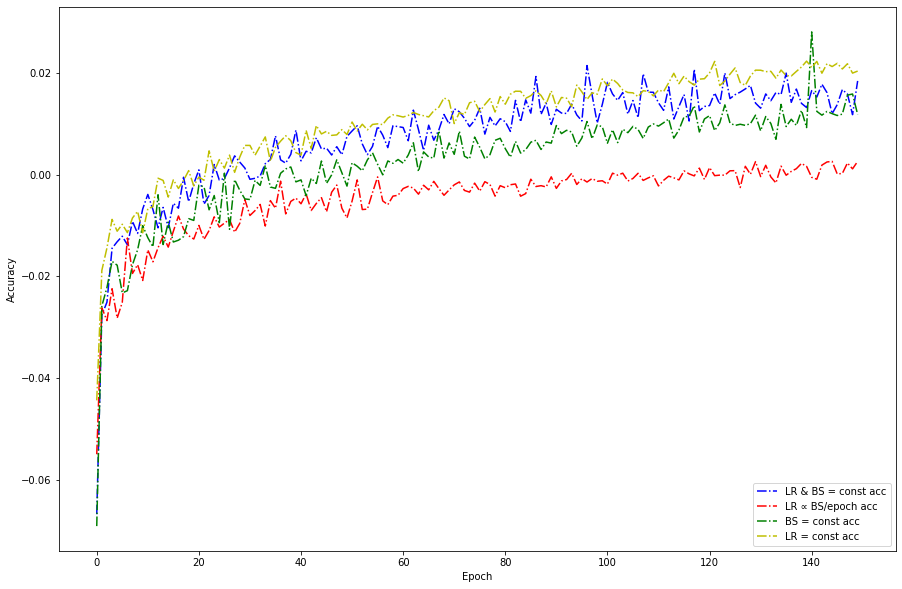

In [25]:
plt.figure(figsize=(15, 10))

plt.plot(acc_1_dif, label='LR & BS = const acc',ls='-.',c='b')
# plt.plot(val_acc_1, label = 'LR & BS = const val_acc',c='b')
plt.plot(acc_2_dif, label='LR ∝ BS/epoch acc',ls='-.',c='r')
# plt.plot(val_acc_2, label = 'LR ∝ BS_/epoch val_acc',c='r')
plt.plot(acc_3_dif, label='BS = const acc',ls='-.',c='g')
# plt.plot(val_acc_3, label = 'BS = const val_acc',c='g')
plt.plot(acc_4_dif, label='LR = const acc',ls='-.',c='y')
# plt.plot(val_acc_4, label = 'LR = const val_acc',c='y')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

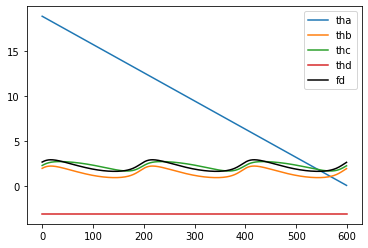

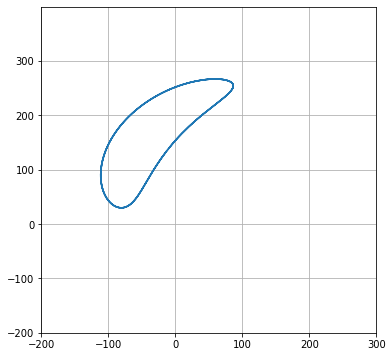

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cmath
import sys


# CHANGE ME!!!!!
# 
# abcd are linkage lengths
# 
# Angle refers to the follower
# 
# Angle_cg refers to follower centre of gravity

# In[15]:


a,b,c,d = 100,250,300,200
assert(b + c >= d + a)


#Change follower parameters
#Degrees
Angle = 40
Angle_cg = Angle- 20

#Relative magnitude, NOT ABSOLUTE LENGTH
Len = 1
Len_cg = 0.7


# In[16]:

ROTATION = 'cw'
MODE = 'open'
#Lengths of the linkages, 
#a,b,c,d represent linkages starting from left fixed and going clockwise
#makes sure that the grashoff condition is satisfied
#Since linkage a is the driving linkage, b+c must be greater than a+d



#the angle that the linkages make wrt xaxis of the fixed points a,d
#step controls how fast the linkage drives
step = 0.01
runtime = 6
if ROTATION == 'cw':
    th_a = np.arange(runtime*np.pi,0,-step*np.pi)
else:
    th_a = np.arange(0,runtime*np.pi,step*np.pi)

#Degrees, used for drawing arcs
th_a_d = th_a * 180/np.pi


# In[17]:

#Freudenstein equation

K1 = d/a
K2 = d/c
K3 = (a**2-b**2+c**2+d**2)/(2*a*c)
A = np.cos(th_a) - K1 - K2*np.cos(th_a) + K3
B = -2*np.sin(th_a)
C = K1 - (K2+1)*np.cos(th_a) + K3

#Grashoff condition
disc = (B**2)-4*A*C 

#Checks if the four_bar linkage is grashoff
assert( np.greater_equal(disc,0).all())


# In[18]:

if MODE =='open':
    th_c = 2*np.arctan((-B - np.sqrt(disc) )/(2*A))
else:
    th_c = 2*np.arctan((-B + np.sqrt(disc) )/(2*A))
    

#Degrees, used for drawing arcs
th_c_d = th_c * 180/np.pi


# In[19]:

th_d = -np.pi*np.ones(len(th_c))


# In[20]:

phase1 = [cmath.exp(1j*i) for i in th_a]
phase3 = [cmath.exp(1j*i) for i in th_c]
phase4 = [cmath.exp(1j*i) for i in th_d]


# In[21]:

R1 = a*np.array(phase1)
R3 = c*np.array(phase3)
R4 = -d*np.array(phase4)


# In[22]:

x1,y1 = np.zeros(len(R1)),np.zeros(len(R1))
x2,y2 = np.real(R1),np.imag(R1)
x3,y3 = np.real(R3+R4),np.imag(R3+R4)
x4,y4 = np.real(R4),np.imag(R4) 


# In[23]:

th_b = np.arctan2((y3-y2),(x3-x2))
# th_b = (th_b + 2*np.pi ) % 2*np.pi

phase2 = [cmath.exp(1j*i) for i in th_b]
R2 = b*np.array(phase2)




# '''
# This is to sketch a follower(F)
# '''
# 
# '''
# plt.plot(x1,y1)
# plt.plot(x3,y3)
# for num in range(5,10):
#     f_d = 45*np.pi/180*np.ones(len(th_a))
#     f = 0.1*num*b
#     phasef = [cmath.exp(1j*i) for i in f_d]
#     Rf = R1+ f*(np.array(phasef)+np.array(phase2))
#     xf,yf = np.real(Rf),np.imag(Rf)
# 
#     _=plt.plot(xf,yf)
# '''

# In[24]:


#Creating angle of the follower wrt ground

f_d = Angle*np.pi/180*np.ones(len(th_a))
f_d += th_b

f_dCG = Angle_cg*np.pi/180*np.ones(len(th_a))
f_dCG += th_b
#Follower size
f = Len*b
fCG = Len_cg*b


# In[25]:

#Phase of follower 
phasef = [cmath.exp(1j*i) for i in f_d]
Rf = R1+ f*(np.array(phasef))
xf,yf = np.real(Rf),np.imag(Rf)

#Phase of follower centre of gravity
phasef_CG = [cmath.exp(1j*i) for i in f_dCG]
Rf_CG = R1+ fCG*(np.array(phasef_CG))
xfg,yfg = np.real(Rf_CG),np.imag(Rf_CG)


# In[26]:

#Plot all angles
l1, = plt.plot(th_a, label = 'tha')
l2, = plt.plot(th_b, label = 'thb')
l3, = plt.plot(th_c, label = 'thc')
l4, = plt.plot(th_d, label = 'thd')
l5, = plt.plot(f_d, label = 'fd',c = 'k')
plt.legend(handles=[l1,l2,l3,l4,l5])
plt.show()



# Animation magic!

# In[27]:

temp = x1,x2,x3,x4
xmin = np.amin([np.amin(mini) for mini in temp])
xmax = np.amax([np.amax(mini) for mini in temp])
temp = y1,y2,y3,y4
ymin = np.amin([np.amin(mini) for mini in temp])
ymax = np.amax([np.amax(mini) for mini in temp])
#xmin,xmax

fig = plt.figure()
fig.set_size_inches(6,6,True)
plt.axis('off')

bord = 100 #give the animation an offset

ax = fig.add_subplot(111, autoscale_on=False,
                     xlim=(xmin-bord, xmax+bord), ylim=(ymin-bord, ymax+bord))

ax.grid()


# In[28]:
#Plot in browser 
from IPython.display import HTML

import matplotlib.animation as animation


# In[29]:

line, = ax.plot([], [], marker = 'o',c = 'k',lw = 6,ms = 10)
line2, = ax.plot([], [], marker = 'o',c = 'b',lw = 6,ms = 4)
line3, = ax.plot([], [], marker = 'x',c = 'g',lw = 5,ms = 20)
#Plotting follower CG path
_ = ax.plot(xfg,yfg)


def init():
    line.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    return line,line2,line3,

def animate(i):
    thisx = [x1[i],x2[i],x3[i],x4[i]]
    thisy = [y1[i],y2[i],y3[i],y4[i]]
    line.set_data(thisx,thisy)
    thisx = [x2[i],xf[i],x3[i]]
    thisy = [y2[i],yf[i],y3[i]]
    line2.set_data(thisx,thisy)
    thisx = [x2[i],xfg[i]]
    thisy = [y2[i],yfg[i]]
    line3.set_data(thisx,thisy)
    return line,line2,line3,


# In[30]:

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y2)),
                              interval=30, blit=True, init_func=init)
plt.show()



# In[31]:
#To save animation, comment out the sys.exit()

#sys.exit()
    
#Save animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps = 30,extra_args=['-vcodec', 'libx264'])
dpi = 100

ani.save('fourbar_mechanism.mp4', writer = writer,dpi = dpi)

In [ ]:
th_a

In [ ]:
for i in th_a:
  print(cmath.exp(1j*i))

In [ ]:
[cmath.exp(1j*i) for i in th_a]


In [8]:
import numpy as n

In [9]:
n.pi

3.141592653589793

In [11]:
arr = [[1,2,3,4,5,6,7,8,9,10],[9,87,5,44,3,2,1],[56,3,21,1]]

In [18]:
arr = [1,2,3,4,5,6,7]

In [20]:
for x in arr:
  gimmeList(x)


1
2
3
4
5
6
7


In [21]:
gimmeList( [ x  for x in arr] )

[1, 2, 3, 4, 5, 6, 7]


In [17]:
def gimmeList(x):
    print(x)

gimmeList([1,2,3])

[1, 2, 3]
